# Matplotlib 연습문제

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

# palette
import seaborn as sns
sns.set_palette("pastel")

# 주피터 노트북
%matplotlib inline

# 한글 폰트
matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("Malgun")])

# 폰트 설정
mpl.rc('font', family='Malgun Gothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

다음은 소상공인 시장 진흥공단에서 제공하는 2년간(2017.10 ~ 2019.09) 국내의 카페 업소 수 데이터를 정리한 CSV 파일이다. 물음에 답하시오. (1번 문제)

cafe_2year.csv

1. Matplotlib을 이용하여 월별 카페의 개수를 나타내는 간단한 막대 그래프(Bar Graph)를 그리는 프로그램을 작성하시오. 단, 막대 그래프의 X축 간격을 3달로 설정한다.

In [2]:
df = pd.read_csv('data/cafe_2year.csv', encoding='utf-8')
df.head(1)

,기준월,카페수
0,201710,79296


In [3]:
df.tail(1)

,기준월,카페수
23,201909,98779


In [90]:
df = pd.read_csv('data/cafe_2year.csv', encoding='utf-8')

# (201710, 201909)
# df['기준월'].min(), df['기준월'].max()

# start = pd.to_datetime(df['기준월'].min(), format='%Y%m')
df['기준월'].to_period()

# periods = int(df['기준월'].shape[0]/3)
# pd.date_range(start=start, periods=periods, freq='3m')

# df['기준월'] = pd.to_datetime(df['기준월'], format='%Y%m')

# pd.date_range(start='2017-12-01', end='2019-09-01', periods=8, freq='3M')
# pd.date_range(start='2017-12-01', periods=9, freq='3m')
# df

AttributeError: 'RangeIndex' object has no attribute 'to_period'

In [ ]:

# for i in df.index:
#     print(i)

# df['기준월'] = pd.to_datetime(df['기준월'], format='%Y-%m-%d')

# x = [i for i in np.arange(0, df['기준월'].shape[0], 3)]
# y = df['카페수'].to_list()
# y = df['카페수']
# y = [0, 3, 6, 9, 12, 15, 18, 21]

# plt.bar(df['기준월'], df['카페수'])
# plt.gca().invert_xaxis()
# df['기준월'].to_list()

# plt.xticks(np.arange(0, len(df['기준월']), step=1), rotation=90)
# # plt.xticks(np.arange(0, len(df['기준월']), step=3))
# plt.ylim(76923, 98779)
# plt.xlabel('년월')
# plt.ylabel('카페수')

# plt.show()

다음은 건강보험 심사평가원에서 제공(2019년 9월 기준)하는 전국의 종합병원의 일반의, 인턴, 레지던트, 전문의 의사 수의 데이터를 저장한 CSV 파일이다. 물음에 답하시오 (2 ~ 6번 문제)

doctor_2019.csv

2. CSV 파일을 읽어서 서울과 6개의 광역시(부산, 대구, 인천, 대전, 광주, 울산)에 대해 지역, 일반의, 인턴, 레지던트, 전문의 의사 수를 출력하는 프로그램을 작성하시오.

In [4]:
df = pd.read_csv('data/doctor_2019.csv', encoding='utf-8')
df2 = df.groupby('지역') \
    .agg('sum') \
    .query("지역 in ['서울', '부산', '대구', '인천', '대전', '광주', '울산']") \
    .sort_values(by=['레지던트 수'], ascending=False) \
    .rename(columns={
        '일반의 수':'일반의', 
        '인턴 수':'인턴', 
        '레지던트 수':'레지던트', 
        '전문의 수':'전문의'
    })
df2

,일반의,인턴,레지던트,전문의
지역,,,,
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467


3. 2번 문제에서 얻은 결과를 doctor2.csv 파일로 저장하는 프로그램을 작성하시오.

In [5]:
df2.to_csv('data/doctor2.csv')

4. 3번 문제에서 저장한 doctor2.csv 파일을 읽어들여 서울과 6개 광역시의 종합 병원 전문의 의사 수르 산포 그래프(Scatter Plot)로 보여 주는 프로그램을 작성하시오.

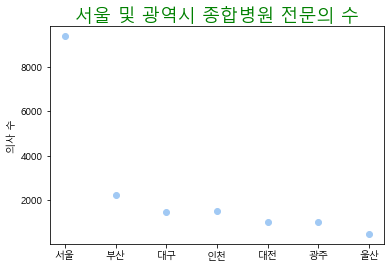

In [6]:
df3 = pd.read_csv('data/doctor2.csv', encoding='utf-8')

plt.scatter(df3['지역'], df3['전문의'])
plt.title('서울 및 광역시 종합병원 전문의 수', color='green', fontsize=18)
plt.ylabel('의사 수')
plt.show()

5. 4번 문제에서 사용한 doctor2.csv 파일을 읽어 서울과 6개 광역시의 종합병원의 일반의, 인턴, 레지던트, 전문의 의사 수를 선 그래프로 나타내는 프로그램을 작성하시오.

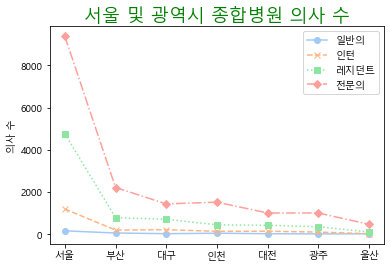

In [7]:
df3 = pd.read_csv('data/doctor2.csv', encoding='utf-8')

plt.plot(df3['지역'], df3['일반의'], label='일반의', linestyle='solid', marker='o')
plt.plot(df3['지역'], df3['인턴'], label='인턴', linestyle='dashed', marker='x')
plt.plot(df3['지역'], df3['레지던트'], label='레지던트', linestyle='dotted', marker='s')
plt.plot(df3['지역'], df3['전문의'], label='전문의', linestyle='dashdot', marker='D')

plt.title('서울 및 광역시 종합병원 의사 수', color='green', fontsize=18)
plt.ylabel('의사 수')

plt.legend()

plt.show()

6. 4번(또는 5번) 문제에서 사용한 doctor2.csv 파일을 읽어 서울 종합병원의 의사 수 분포를 의사 유형별로 나타내는 파이 그래프를 그리는 프로그램을 작성하시오.

In [8]:
df3 = pd.read_csv('data/doctor2.csv', encoding='utf-8')
df3

,지역,일반의,인턴,레지던트,전문의
0,서울,162,1196,4757,9375
1,부산,58,197,785,2211
2,대구,27,215,712,1436
3,인천,47,138,444,1518
4,대전,25,142,425,1006
5,광주,16,102,356,1006
6,울산,19,23,104,467


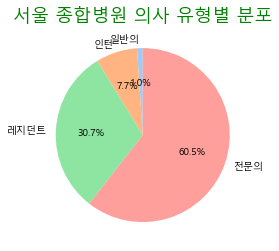

In [9]:
grp = df3.query("지역 in '서울'")
fig, axes = plt.subplots()

axes.pie(grp.values.tolist()[0][1:], labels=[i for i in grp if i not in '지역'], autopct='%.1f%%', startangle=90, counterclock=True)

plt.title('서울 종합병원 의사 유형별 분포', color='green', fontsize=18)

plt.show()